In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/IDS400/")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
health = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',delimiter=',')

In [ ]:
health = pd.DataFrame(health)
health['BMI Category'] = health['BMI Category'].replace('Normal Weight', 'Normal')



In [ ]:
health = pd.DataFrame(health)

health['Sleep Disorder'] = health['Sleep Disorder'].replace({np.NaN: 0, 'Sleep Apnea': 1, 'Insomnia' : 1})
print(health)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

<ipython-input-6-15536a986519>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health['Sleep Disorder'] = health['Sleep Disorder'].replace({np.NaN: 0, 'Sleep Apnea': 1, 'Insomnia' : 1})


In [ ]:
independent_variable = health[['Physical Activity Level', 'Sleep Disorder']]
dependent_variable = health['Quality of Sleep']

independent_variable = sm.add_constant(independent_variable)


model = sm.OLS(dependent_variable, independent_variable).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     30.95
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.71e-13
Time:                        05:04:05   Log-Likelihood:                -568.57
No. Observations:                 374   AIC:                             1143.
Df Residuals:                     371   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

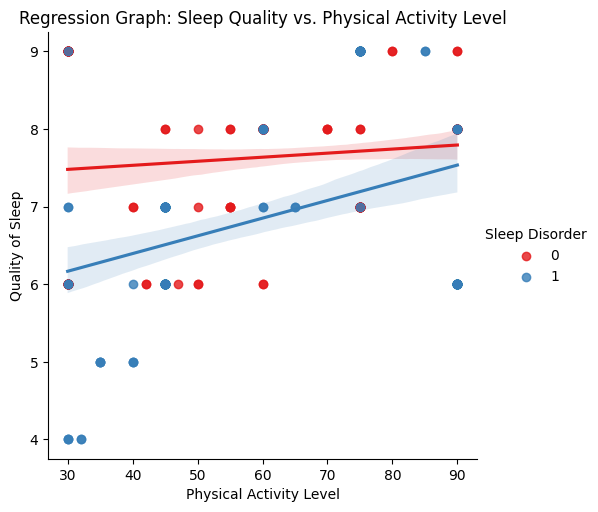

In [ ]:
health = pd.DataFrame(health)

sns.lmplot(
    data=health,
    x='Physical Activity Level',
    y='Quality of Sleep',
    hue='Sleep Disorder',
    palette='Set1'
)

plt.title('Regression Graph: Sleep Quality vs. Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')

plt.show()

Text(0.5, 1.0, 'Sleep Quality and Stress Level by Age')

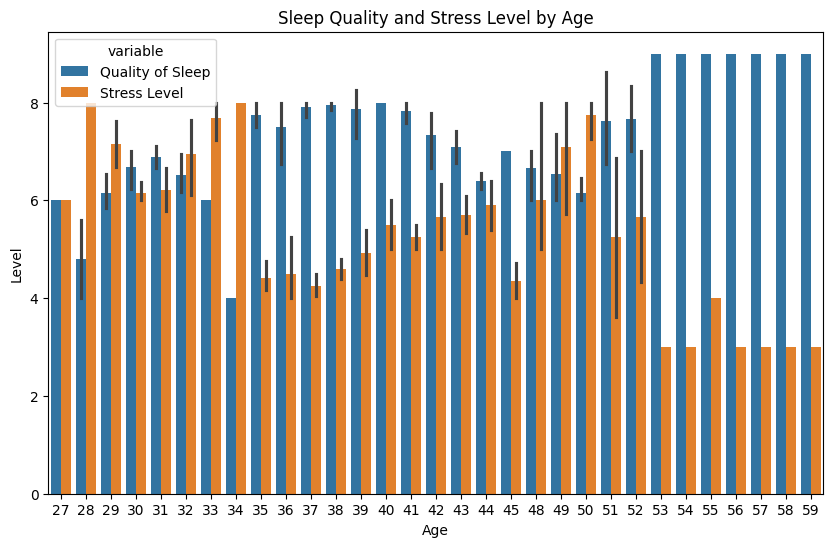

In [ ]:
health = pd.DataFrame(health)

health_melted = pd.melt(health, id_vars=["Age"], value_vars=["Quality of Sleep", "Stress Level"],
                    var_name="variable", value_name="value")


plt.figure(figsize=(10, 6))
sns.barplot(x="Age", y="value", hue="variable", data=health_melted)

plt.xlabel('Age')
plt.ylabel('Level')
plt.title('Sleep Quality and Stress Level by Age')


In [ ]:
new_health = pd.DataFrame(health)
new_health['BMI Category'] = health['BMI Category'].replace({'Normal': 0, 'Overweight': 1, 'Obese' : 2})


<ipython-input-10-be0f26df1821>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_health['BMI Category'] = health['BMI Category'].replace({'Normal': 0, 'Overweight': 1, 'Obese' : 2})


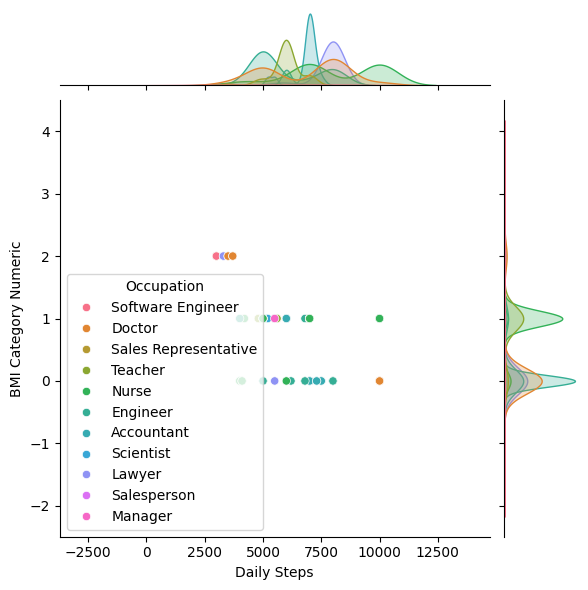

In [ ]:
new_health['BMI Category Numeric'] = new_health['BMI Category'].astype('category').cat.codes
sns.jointplot(data=new_health, x="Daily Steps", y="BMI Category Numeric", hue="Occupation")

In [ ]:
specific_occupation = "Nurse"
print(f"Correlation matrix for {specific_occupation}")
print(new_health[new_health["Occupation"] == specific_occupation][["Daily Steps", "BMI Category"]].corr())


Correlation matrix for Nurse
              Daily Steps  BMI Category
Daily Steps      1.000000      0.479187
BMI Category     0.479187      1.000000


In [ ]:
disorder_counts = health["Sleep Disorder"].value_counts()
print(disorder_counts)

Sleep Disorder
0    219
1    155
Name: count, dtype: int64


In [ ]:
print(155/(155+219)*100)

41.44385026737968


In [ ]:
BMI_counts = health["BMI Category"].value_counts()
print(BMI_counts)

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64
